# Bagging
1. Bootstrapping + Aggregation
2. Bootstrapping: Drawing random Sample from population

3. Ex: 10k Data => take multiple models m1,m2,m3.... All of same algo 
4. Train these => each model will be given only some rows => Bootstrapping from main Data => d1,d2,d3.... will be given to m1,m2.... respectively

5. Aggregation => Final Ans/Output: Majority Count = Mode 

## Why Bagging?
1. Bias Variance Trade-OFF ==> we need low bais and variance 
2. We take m1,m2,m3... each is LBHV(low bais high var){overfits} 

3. Ex 10k total points => we give distributed points to each model hence even if we get 100-200 bad rows since there is ditribution bad-rows to each model decreases hence variace becomes low

4. Therefore Bagging makes Algo LBLV thereby increasing results accuracy

## Code

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
df = pd.read_csv('Iris.csv')
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])

In [2]:
df = df[df['Species'] != 0][['SepalWidthCm','PetalLengthCm','Species']]

In [3]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

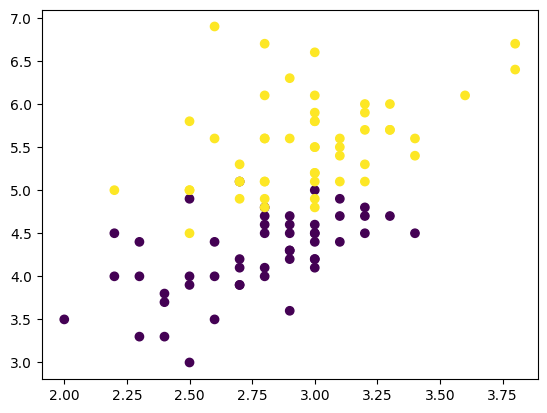

In [4]:
import matplotlib.pyplot as plt
plt.scatter(df.iloc[:,0],df.iloc[:,1],c = df['Species'])

In [5]:
from sklearn.model_selection import cross_val_score
np.mean(cross_val_score(dt,df.iloc[:,:2],df.iloc[:,-1],cv=10))*100

88.00000000000001

## Sampling

In [6]:
df = df.sample(100) ## Sample == Random
df_train = df.iloc[:60,:].sample(10)
df_val = df.iloc[60:80,:].sample(5)
df_test= df.iloc[80:,:].sample(5)

### Case-1 Bagging

In [7]:
from sklearn.ensemble import BaggingClassifier
Bag1 = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(),
    max_samples=0.25, # How many rows in each model
    n_estimators=500, # No. of estimators
    bootstrap=True,
    random_state=42
)
np.mean(cross_val_score(Bag1,df.iloc[:,:2],df.iloc[:,-1],cv=10))*100

91.00000000000001

#### Pasting: Bootstrap = False ==> No repetation

1. Bootstrapping give better results

In [8]:
Bag2 = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(),
    max_samples=0.25, # How many rows in each model
    n_estimators=500, # No. of estimators
    bootstrap=False,
    random_state=42
)
np.mean(cross_val_score(Bag2,df.iloc[:,:2],df.iloc[:,-1],cv=10))*100

91.00000000000001

#### Due to Randomness there are estimated 37% of rows That never come out to get trained into any model 
#### Called OOB: Out of Bag samples
## OOB Score
1. We can use these unseen row to validate
2. Works for fit data method

In [9]:
Bag3 = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(),
    max_samples=0.25, # How many rows in each model
    n_estimators=500, # No. of estimators
    bootstrap=True,
    oob_score=True,
    random_state=42
)
# Bag3.fit(x,y)
# Bag3.oob_score_ # Gives approx accuracy of dataset 

# Grid Search CV

In [10]:
from sklearn.model_selection import GridSearchCV
parameters = {
    'n_estimators':[50,100,500],
    'max_samples': [0.1,0.4,0.7,1.0],
    'bootstrap':[True,False],
    'max_features': [0.1,0.4,0.7,1.0]
} 

search = GridSearchCV(BaggingClassifier(),parameters,cv = 5)

In [11]:
search.fit(df.iloc[:,:2],df.iloc[:,-1])

GridSearchCV(cv=5, estimator=BaggingClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_features': [0.1, 0.4, 0.7, 1.0],
                         'max_samples': [0.1, 0.4, 0.7, 1.0],
                         'n_estimators': [50, 100, 500]})

In [12]:
search.best_params_

{'bootstrap': True,
 'max_features': 0.4,
 'max_samples': 0.1,
 'n_estimators': 50}

# Bagging Regressor is same As classifier
1. Aggregation is mean of all models just 
2. Gives better Results then many algo

#### Note: Base Estimator can be None, LR, DTRegressor, KNNRegressor,etc
